<a href="https://colab.research.google.com/github/rhrdiana/Kecerdasan-Buatan-25/blob/main/Matku_AI_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [19]:
data = load_diabetes()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

print(X.head())
print(y.head())

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641  
0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
dtype: float64


In [2]:
X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [3]:
lr = LinearRegression()
dt = DecisionTreeRegressor(max_depth=5, random_state=42)
svr = SVR(kernel='rbf')
ann = MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)

In [4]:
lr.fit(X_train, y_train)
dt.fit(X_train, y_train)
svr.fit(X_train, y_train)
ann.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)

In [5]:
y_pred_lr = lr.predict(X_test)
y_pred_dt = dt.predict(X_test)
y_pred_svr = svr.predict(X_test)
y_pred_ann = ann.predict(X_test)

In [6]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [7]:
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
mape_lr = mean_absolute_percentage_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

In [8]:
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
mape_dt = mean_absolute_percentage_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

In [9]:
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
mape_svr = mean_absolute_percentage_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

In [10]:
mse_ann = mean_squared_error(y_test, y_pred_ann)
rmse_ann = np.sqrt(mse_ann)
mape_ann = mean_absolute_percentage_error(y_test, y_pred_ann)
r2_ann = r2_score(y_test, y_pred_ann)

In [12]:
df_eval = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'SVR', 'ANN'],
    'MSE': [mse_lr, mse_dt, mse_svr, mse_ann],
    'RMSE': [rmse_lr, rmse_dt, rmse_svr, rmse_ann],
    'MAPE': [mape_lr, mape_dt, mape_svr, mape_ann],
    'R2': [r2_lr, r2_dt, r2_svr, r2_ann]
})

In [13]:
df_eval = df_eval.round(3)

print(df_eval)

               Model       MSE    RMSE    MAPE     R2
0  Linear Regression  2900.194  53.853  37.500  0.453
1      Decision Tree  3526.016  59.380  39.717  0.334
2                SVR  4333.286  65.828  49.028  0.182
3                ANN  2900.255  53.854  37.258  0.453


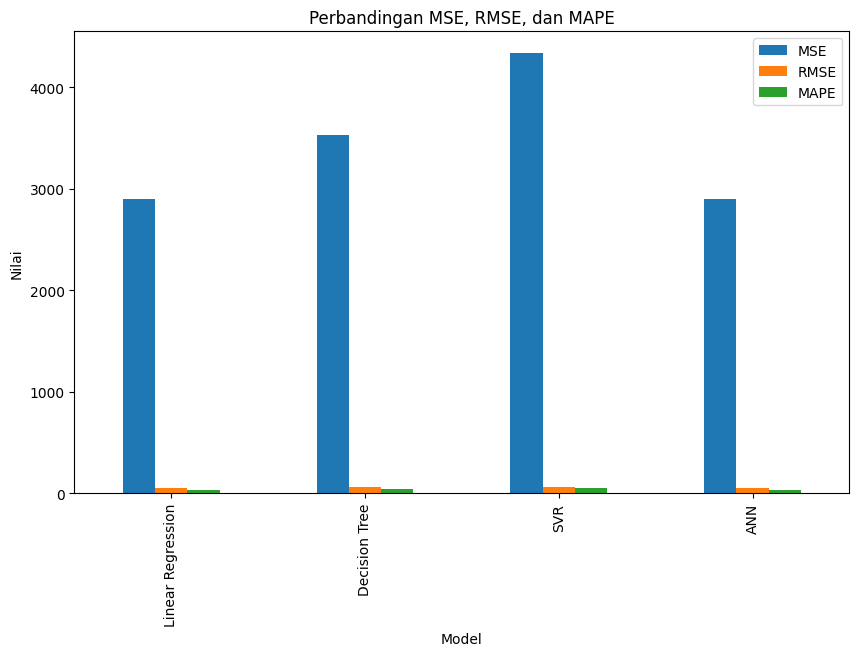

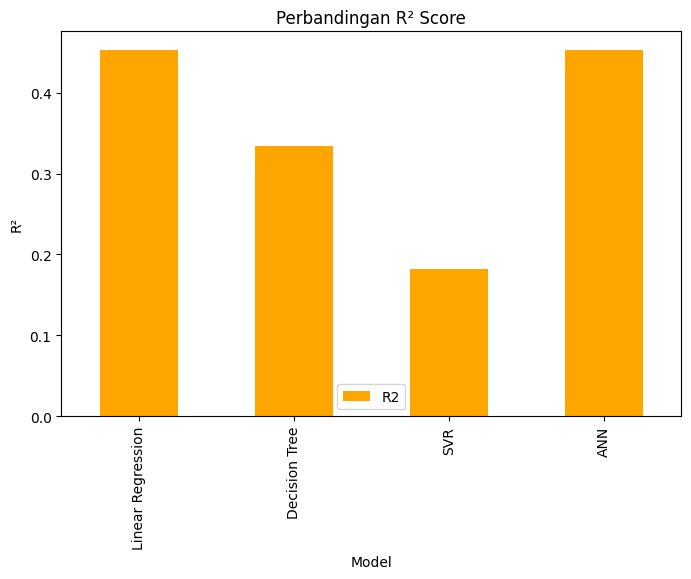

In [14]:
df_eval.plot(x='Model', y=['MSE', 'RMSE', 'MAPE'], kind='bar', figsize=(10,6))
plt.title('Perbandingan MSE, RMSE, dan MAPE')
plt.ylabel('Nilai')
plt.show()

df_eval.plot(x='Model', y='R2', kind='bar', figsize=(8,5), color='orange')
plt.title('Perbandingan R² Score')
plt.ylabel('R²')
plt.show()

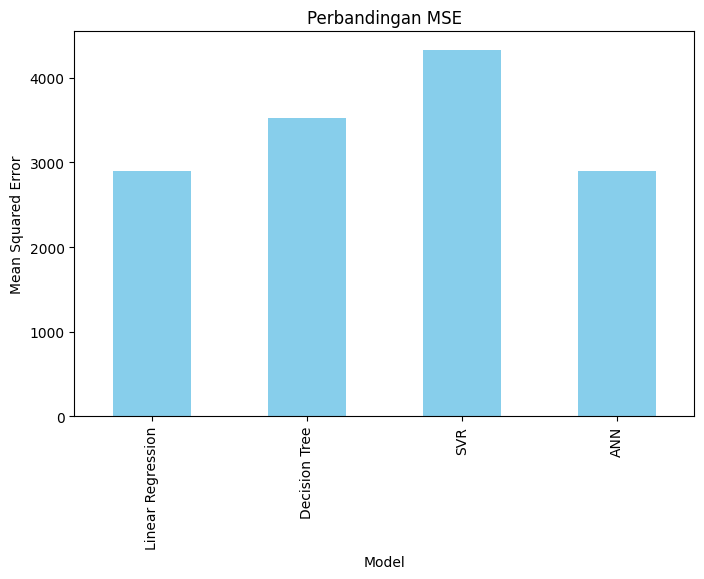

In [15]:
df_eval.plot(
    x='Model', y='MSE', kind='bar',
    figsize=(8,5), color='skyblue', legend=False)
plt.title('Perbandingan MSE')
plt.ylabel('Mean Squared Error')
plt.xlabel('Model')
plt.show()

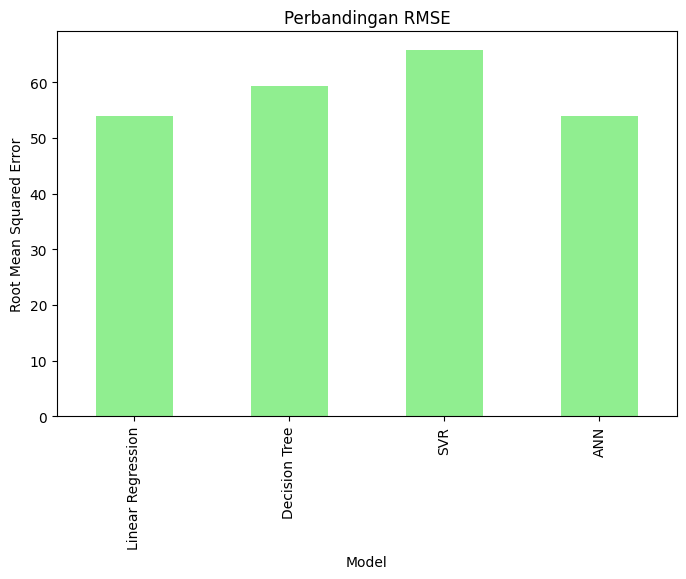

In [16]:
df_eval.plot(
    x='Model', y='RMSE', kind='bar',
    figsize=(8,5), color='lightgreen', legend=False)
plt.title('Perbandingan RMSE')
plt.ylabel('Root Mean Squared Error')
plt.xlabel('Model')
plt.show()

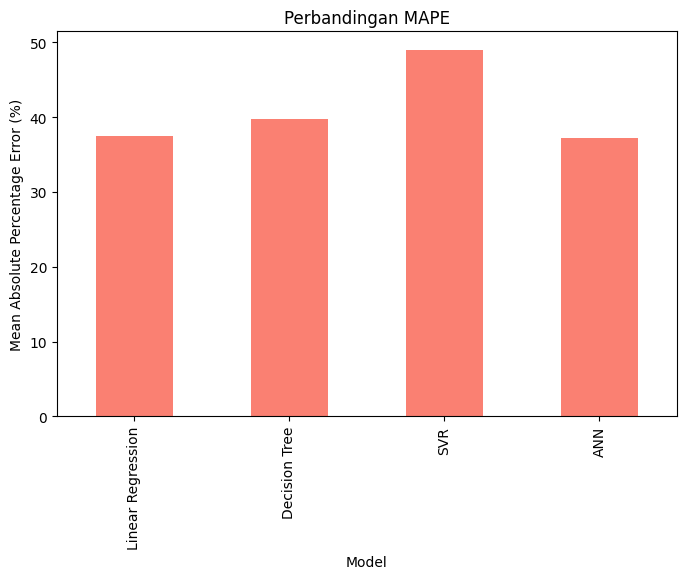

In [17]:
df_eval.plot(
    x='Model', y='MAPE', kind='bar',
    figsize=(8,5), color='salmon', legend=False)
plt.title('Perbandingan MAPE')
plt.ylabel('Mean Absolute Percentage Error (%)')
plt.xlabel('Model')
plt.show()

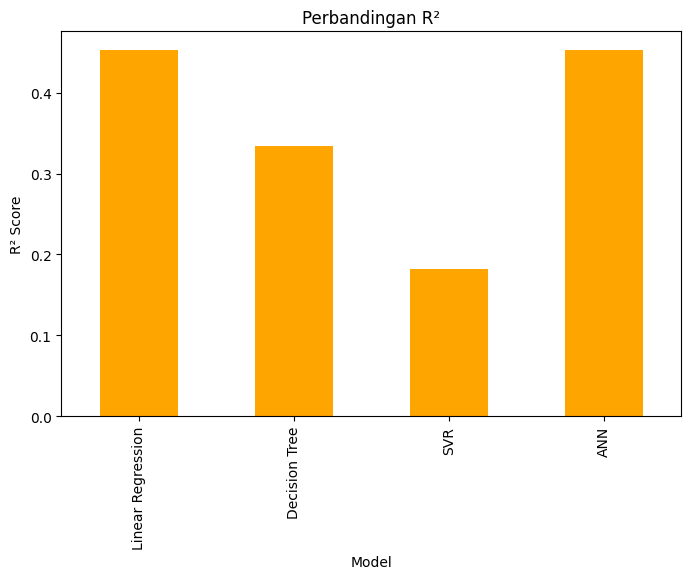

In [18]:
df_eval.plot(
    x='Model', y='R2', kind='bar',
    figsize=(8,5), color='orange', legend=False)
plt.title('Perbandingan R²')
plt.ylabel('R² Score')
plt.xlabel('Model')
plt.show()

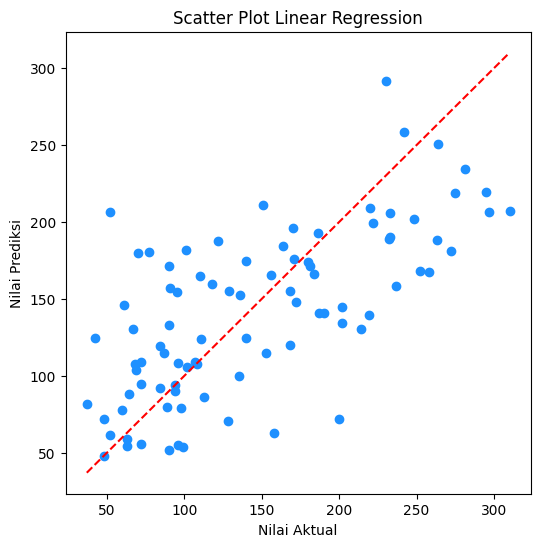

In [20]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_lr, color='dodgerblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')
plt.title('Scatter Plot Linear Regression')
plt.show()

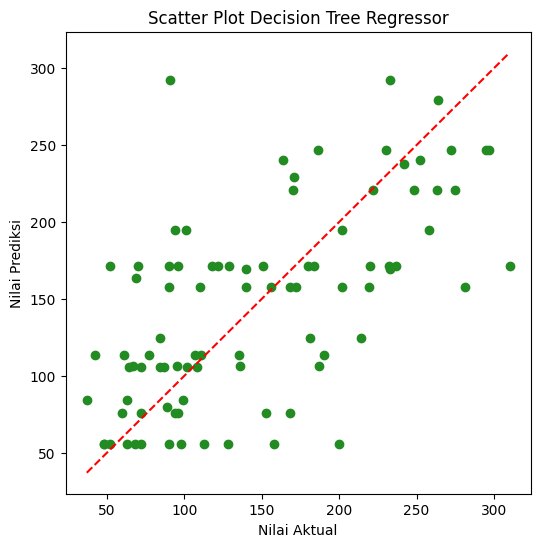

In [21]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_dt, color='forestgreen')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')
plt.title('Scatter Plot Decision Tree Regressor')
plt.show()

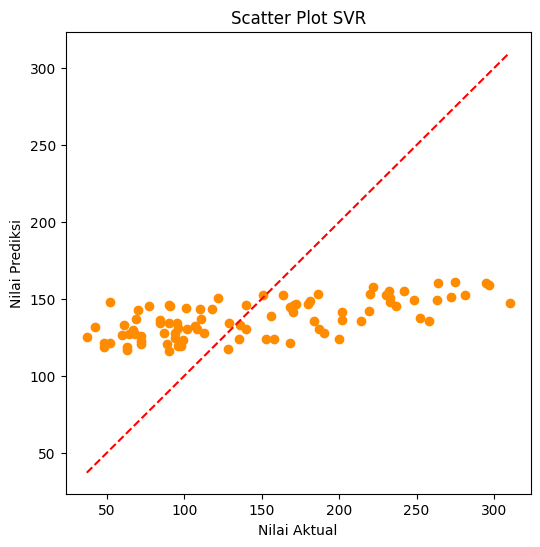

In [22]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_svr, color='darkorange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')
plt.title('Scatter Plot SVR')
plt.show()

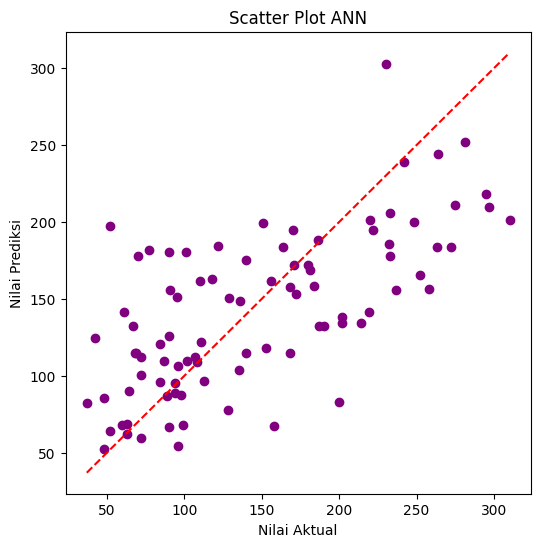

In [23]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_ann, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')
plt.title('Scatter Plot ANN')
plt.show()

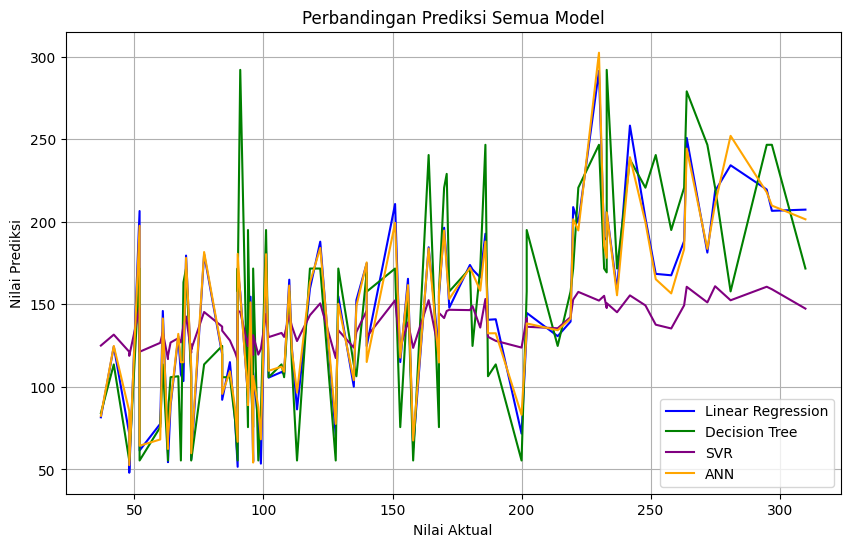

In [24]:
y_test_sorted_idx = np.argsort(y_test)
y_actual_sorted = y_test[y_test_sorted_idx]
y_pred_lr_sorted = y_pred_lr[y_test_sorted_idx]
y_pred_dt_sorted = y_pred_dt[y_test_sorted_idx]
y_pred_svr_sorted = y_pred_svr[y_test_sorted_idx]
y_pred_ann_sorted = y_pred_ann[y_test_sorted_idx]

plt.figure(figsize=(10, 6))
plt.plot(y_actual_sorted, y_pred_lr_sorted, label='Linear Regression', color='blue')
plt.plot(y_actual_sorted, y_pred_dt_sorted, label='Decision Tree', color='green')
plt.plot(y_actual_sorted, y_pred_svr_sorted, label='SVR', color='purple')
plt.plot(y_actual_sorted, y_pred_ann_sorted, label='ANN', color='orange')

plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')
plt.title('Perbandingan Prediksi Semua Model')
plt.legend()
plt.grid(True)
plt.show()